In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import pickle

In [2]:
df = pd.read_csv('Datasat Final.csv', encoding= 'unicode_escape')

In [3]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,referral_source,Class,Medication
0,41,F,f,f,f,f,f,f,f,f,...,f,t,1.3,t,2.5,t,125,SVHC,Normal,NaN
1,23,F,f,f,f,f,f,f,f,f,...,f,t,4.1,t,2,t,102,other,Normal,NaN
2,46,M,f,f,f,f,f,f,f,f,...,f,t,0.98,f,?,t,109,other,Normal,NaN
3,70,F,t,f,f,f,f,f,f,f,...,f,t,0.16,t,1.9,t,175,other,Hyperthyroidism,Antithyroid drug
4,70,F,f,f,f,f,f,f,f,f,...,f,t,0.72,t,1.2,t,61,SVI,Normal,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,f,?,f,?,f,?,other,Hyperthyroidism,Antithyroid drug
3768,68,F,f,f,f,f,f,f,f,f,...,f,t,1,t,2.1,t,124,SVI,Normal,NaN
3769,74,F,f,f,f,f,f,f,f,f,...,f,t,5.1,t,1.8,t,112,other,Normal,NaN
3770,72,M,f,f,f,f,f,f,f,f,...,f,t,0.7,t,2,t,82,SVI,Normal,NaN


In [4]:
df.dtypes

age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
sick                         object
pregnant                     object
thyroid_surgery              object
I131_treatment               object
query_hypothyroid            object
query_hyperthyroid           object
goitre                       object
hypopituitary                object
psych                        object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
referral_source              object
Class                        object
Medication                   object
dtype: object

In [5]:
df.isnull().sum()

age                             0
sex                             0
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
goitre                          0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                             0
T3_measured                     0
T3                              0
TT4_measured                    0
TT4                             0
referral_source                 0
Class                           0
Medication                   2473
dtype: int64

In [6]:
n = len(df[df['Class'] == 'Hyperthyroidism'])
print("No of Hyperthyroidism in Dataset:",n)

n1 = len(df[df['Class'] == 'Hypothyroidism'])
print("No of Hypothyroidism in Dataset:",n1)
n1 = len(df[df['Class'] == 'Normal'])
print("No of normal in Dataset:",n1)

No of Hyperthyroidism in Dataset: 1190
No of Hypothyroidism in Dataset: 109
No of normal in Dataset: 2473


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3772 non-null   object
 1   sex                        3772 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  goitre                     3772 non-null   object
 12  hypopituitary              3772 non-null   object
 13  psych                      3772 non-null   object
 14  TSH_meas

In [8]:
import numpy as np

In [9]:
df = df.replace('?', np.nan)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        3771 non-null   object
 1   sex                        3622 non-null   object
 2   on_thyroxine               3772 non-null   object
 3   query_on_thyroxine         3772 non-null   object
 4   on_antithyroid_medication  3772 non-null   object
 5   sick                       3772 non-null   object
 6   pregnant                   3772 non-null   object
 7   thyroid_surgery            3772 non-null   object
 8   I131_treatment             3772 non-null   object
 9   query_hypothyroid          3772 non-null   object
 10  query_hyperthyroid         3772 non-null   object
 11  goitre                     3772 non-null   object
 12  hypopituitary              3772 non-null   object
 13  psych                      3772 non-null   object
 14  TSH_meas

In [11]:
df.isnull().sum()

age                             1
sex                           150
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
goitre                          0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           369
T3_measured                     0
T3                            769
TT4_measured                    0
TT4                           231
referral_source                 0
Class                           0
Medication                   2473
dtype: int64

In [12]:
df = df.drop(['Medication'], axis=1)

In [13]:
new_df=df.dropna()

In [14]:
new_df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
goitre                       0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
referral_source              0
Class                        0
dtype: int64

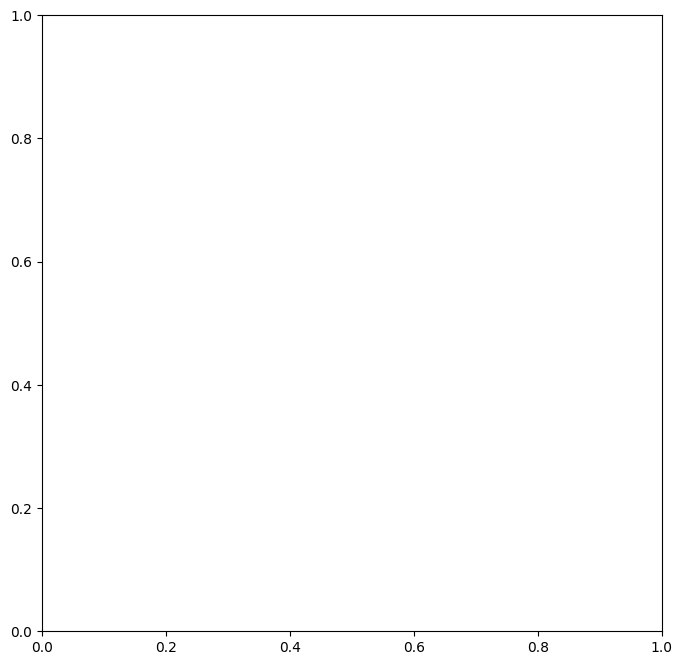

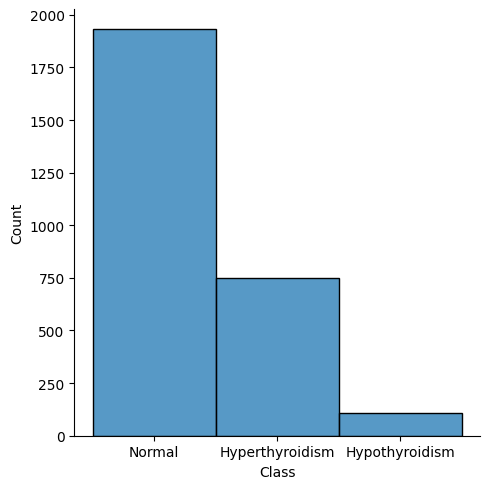

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
sns.displot(new_df['Class'])

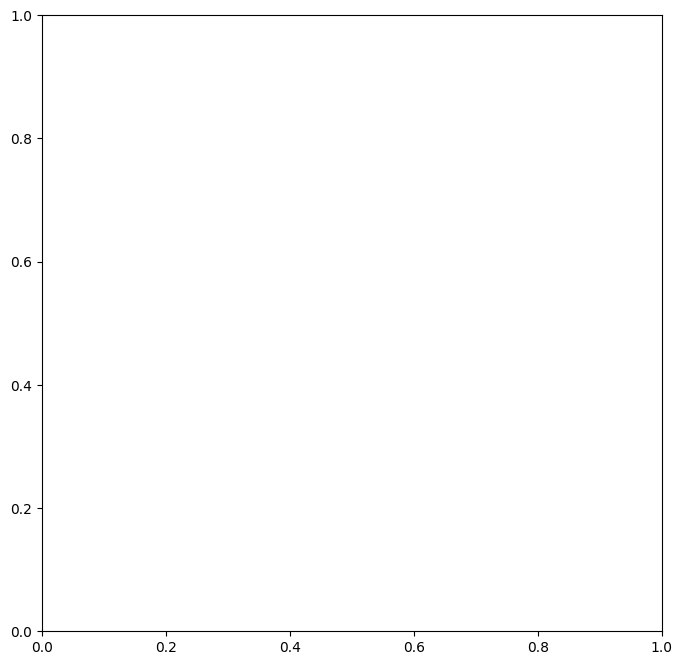

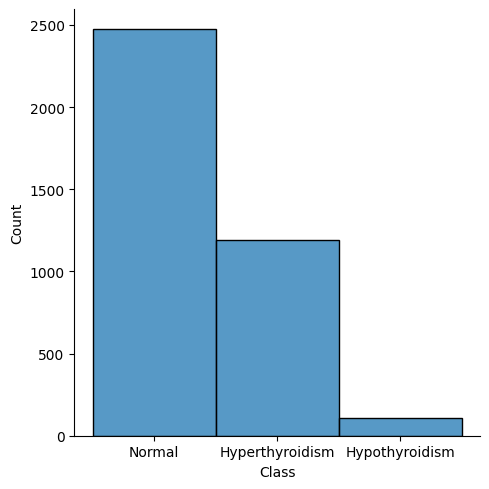

In [16]:
fig, ax = plt.subplots(figsize=(8,8))
sns.displot(df['Class'])

In [17]:
df.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
goitre                         0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                          369
T3_measured                    0
T3                           769
TT4_measured                   0
TT4                          231
referral_source                0
Class                          0
dtype: int64

In [18]:
df[['TSH','T3','TT4']]=df[['TSH','T3','TT4']].astype(float)

In [19]:
df['TSH'].fillna(df['TSH'].median(), inplace=True)

In [20]:
df.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
goitre                         0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                            0
T3_measured                    0
T3                           769
TT4_measured                   0
TT4                          231
referral_source                0
Class                          0
dtype: int64

In [21]:
df['T3'].fillna(df['T3'].median(), inplace=True)

In [22]:
df.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
goitre                         0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                            0
T3_measured                    0
T3                             0
TT4_measured                   0
TT4                          231
referral_source                0
Class                          0
dtype: int64

<AxesSubplot: >

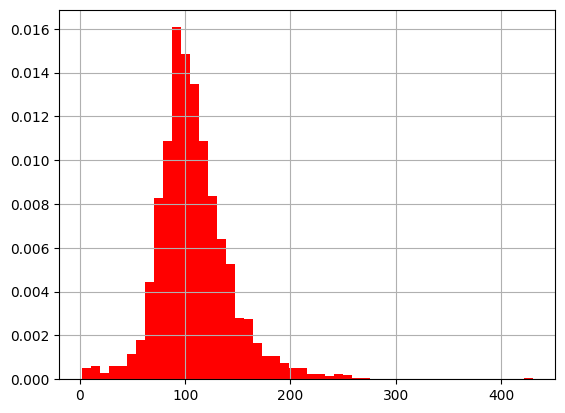

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
#Original Data
df['TT4'].hist(bins=50, ax=ax, density=True, color='red')

<AxesSubplot: ylabel='Density'>

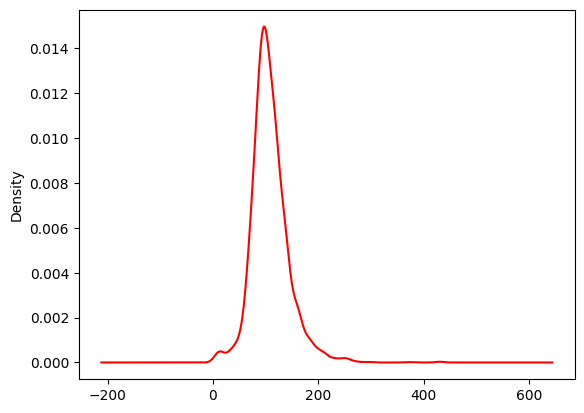

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)
#Original Data
df['TT4'].plot.density(color='red')

In [25]:
df['TT4'].fillna(df['TT4'].median(), inplace=True)

<AxesSubplot: >

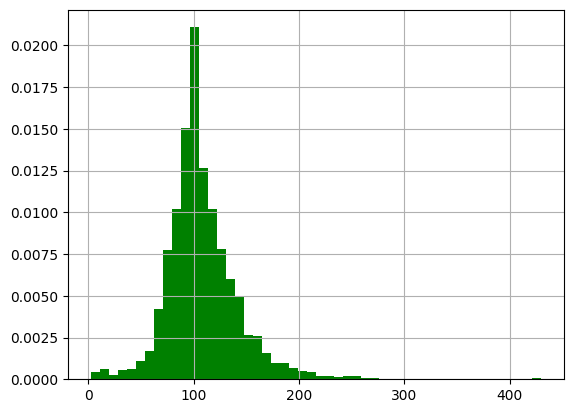

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
#Final Data
df['TT4'].hist(bins=50, ax=ax, density=True, color='green')

<AxesSubplot: ylabel='Density'>

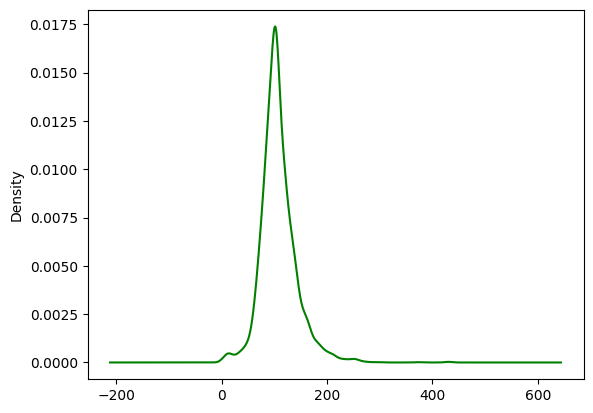

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111)
#Original Data
df['TT4'].plot.density(color='green')

In [28]:
df.isnull().sum()

age                            1
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
goitre                         0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                            0
T3_measured                    0
T3                             0
TT4_measured                   0
TT4                            0
referral_source                0
Class                          0
dtype: int64

In [29]:
df.isnull().mean()*100 #Percentage of Data missing

age                          0.026511
sex                          3.976670
on_thyroxine                 0.000000
query_on_thyroxine           0.000000
on_antithyroid_medication    0.000000
sick                         0.000000
pregnant                     0.000000
thyroid_surgery              0.000000
I131_treatment               0.000000
query_hypothyroid            0.000000
query_hyperthyroid           0.000000
goitre                       0.000000
hypopituitary                0.000000
psych                        0.000000
TSH_measured                 0.000000
TSH                          0.000000
T3_measured                  0.000000
T3                           0.000000
TT4_measured                 0.000000
TT4                          0.000000
referral_source              0.000000
Class                        0.000000
dtype: float64

In [30]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,f,f,t,1.30,t,2.5,t,125.0,SVHC,Normal
1,23,F,f,f,f,f,f,f,f,f,...,f,f,t,4.10,t,2.0,t,102.0,other,Normal
2,46,M,f,f,f,f,f,f,f,f,...,f,f,t,0.98,f,2.0,t,109.0,other,Normal
3,70,F,t,f,f,f,f,f,f,f,...,f,f,t,0.16,t,1.9,t,175.0,other,Hyperthyroidism
4,70,F,f,f,f,f,f,f,f,f,...,f,f,t,0.72,t,1.2,t,61.0,SVI,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,F,f,f,f,f,f,f,f,f,...,f,f,f,1.40,f,2.0,f,103.0,other,Hyperthyroidism
3768,68,F,f,f,f,f,f,f,f,f,...,f,f,t,1.00,t,2.1,t,124.0,SVI,Normal
3769,74,F,f,f,f,f,f,f,f,f,...,f,f,t,5.10,t,1.8,t,112.0,other,Normal
3770,72,M,f,f,f,f,f,f,f,f,...,f,f,t,0.70,t,2.0,t,82.0,SVI,Normal


In [31]:
df['age'].fillna((df['age'].median()), inplace = True)
df.isnull().sum()

age                            0
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
goitre                         0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                            0
T3_measured                    0
T3                             0
TT4_measured                   0
TT4                            0
referral_source                0
Class                          0
dtype: int64

In [32]:
df['age']=df['age'].astype(int)

In [33]:
df.isnull().sum()

age                            0
sex                          150
on_thyroxine                   0
query_on_thyroxine             0
on_antithyroid_medication      0
sick                           0
pregnant                       0
thyroid_surgery                0
I131_treatment                 0
query_hypothyroid              0
query_hyperthyroid             0
goitre                         0
hypopituitary                  0
psych                          0
TSH_measured                   0
TSH                            0
T3_measured                    0
T3                             0
TT4_measured                   0
TT4                            0
referral_source                0
Class                          0
dtype: int64

In [34]:
most_frequent_sex = df['sex'].mode()[0]

In [35]:
df = df.fillna({'sex': most_frequent_sex})

In [36]:
df.isnull().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
goitre                       0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
referral_source              0
Class                        0
dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_7244\17782672.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\User\AppData\Local\Temp\ipykernel_7244\17782672.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])
C:\Users\User\AppData\Local\Temp\ipykernel_7244\177826

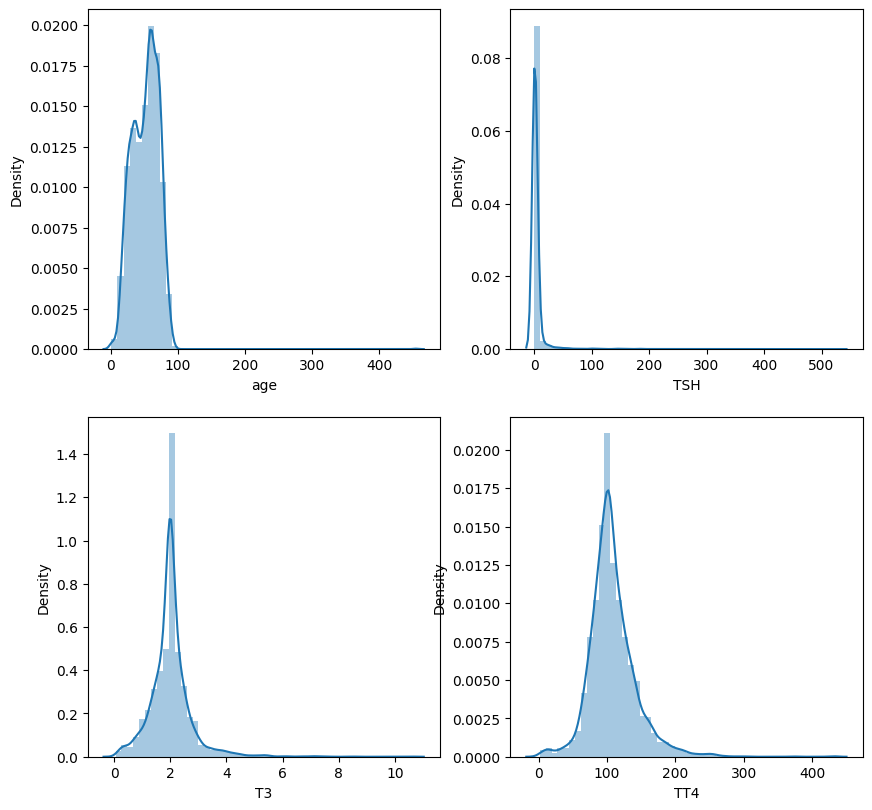

In [37]:
columns = ['age','TSH','T3','TT4']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [38]:
df['age'].unique()

array([ 41,  23,  46,  70,  18,  59,  80,  66,  68,  84,  67,  71,  28,
        65,  42,  63,  51,  81,  54,  55,  60,  25,  73,  34,  78,  37,
        85,  26,  58,  64,  44,  48,  61,  35,  83,  21,  87,  53,  77,
        27,  69,  74,  38,  76,  45,  36,  22,  43,  72,  82,  31,  39,
        49,  62,  57,   1,  50,  30,  29,  75,  19,   7,  79,  17,  24,
        15,  32,  47,  16,  52,  33,  13,  10,  89,  56,  20,  90,  40,
        88,  14,  86,  94,  12,   4,  11,   8,   5, 455,   2,  91,   6,
        93,  92])

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   int32  
 1   sex                        3772 non-null   object 
 2   on_thyroxine               3772 non-null   object 
 3   query_on_thyroxine         3772 non-null   object 
 4   on_antithyroid_medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid_surgery            3772 non-null   object 
 8   I131_treatment             3772 non-null   object 
 9   query_hypothyroid          3772 non-null   object 
 10  query_hyperthyroid         3772 non-null   object 
 11  goitre                     3772 non-null   object 
 12  hypopituitary              3772 non-null   object 
 13  psych                      3772 non-null   objec

In [40]:
df['sex'].unique()

array(['F', 'M'], dtype=object)

In [41]:
df.loc[df['sex']=='F', 'sex'] = 0
df.loc[df['sex']=='M', 'sex'] = 1

In [42]:
df['on_thyroxine'].unique()

array(['f', 't'], dtype=object)

In [43]:
df.loc[df['on_thyroxine']=='f', 'on_thyroxine'] = 0
df.loc[df['on_thyroxine']=='t', 'on_thyroxine'] = 1

In [44]:
df.loc[df['query_on_thyroxine']=='f', 'query_on_thyroxine'] = 0
df.loc[df['query_on_thyroxine']=='t', 'query_on_thyroxine'] = 1

In [45]:
df['on_antithyroid_medication'].unique()

array(['f', 't'], dtype=object)

In [46]:
df.loc[df['on_antithyroid_medication']=='f', 'on_antithyroid_medication'] = 0
df.loc[df['on_antithyroid_medication']=='t', 'on_antithyroid_medication'] = 1

In [47]:
df['sick'].unique()

array(['f', 't'], dtype=object)

In [48]:
df.loc[df['sick']=='f', 'sick'] = 0
df.loc[df['sick']=='t', 'sick'] = 1

In [49]:
df['pregnant'].unique()

array(['f', 't'], dtype=object)

In [50]:
df.loc[df['pregnant']=='f', 'pregnant'] = 0
df.loc[df['pregnant']=='t', 'pregnant'] = 1

In [51]:
df['thyroid_surgery'].unique()

array(['f', 't'], dtype=object)

In [52]:
df.loc[df['thyroid_surgery']=='f', 'thyroid_surgery'] = 0
df.loc[df['thyroid_surgery']=='t', 'thyroid_surgery'] = 1

In [53]:
df['I131_treatment'].unique()

array(['f', 't'], dtype=object)

In [54]:
df.loc[df['I131_treatment']=='f', 'I131_treatment'] = 0
df.loc[df['I131_treatment']=='t', 'I131_treatment'] = 1

In [55]:
df['query_hypothyroid'].unique()

array(['f', 't'], dtype=object)

In [56]:
df.loc[df['query_hypothyroid']=='f', 'query_hypothyroid'] = 0
df.loc[df['query_hypothyroid']=='t', 'query_hypothyroid'] = 1

In [57]:
df['query_hyperthyroid'].unique()

array(['f', 't'], dtype=object)

In [58]:
df.loc[df['query_hyperthyroid']=='f', 'query_hyperthyroid'] = 0
df.loc[df['query_hyperthyroid']=='t', 'query_hyperthyroid'] = 1

In [59]:
df['goitre'].unique()

array(['f', 't'], dtype=object)

In [60]:
df.loc[df['goitre']=='f', 'goitre'] = 0
df.loc[df['goitre']=='t', 'goitre'] = 1

In [61]:
df['hypopituitary'].unique()

array(['f', 't'], dtype=object)

In [62]:
df.loc[df['hypopituitary']=='f', 'hypopituitary'] = 0
df.loc[df['hypopituitary']=='t', 'hypopituitary'] = 1

In [63]:
df[['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','goitre','hypopituitary','query_hyperthyroid']]=df[['sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','sick','pregnant','thyroid_surgery','I131_treatment','query_hypothyroid','goitre','hypopituitary','query_hyperthyroid']].astype(int)

In [64]:
df['query_hyperthyroid'].unique()

array([0, 1])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3772 non-null   int32  
 1   sex                        3772 non-null   int32  
 2   on_thyroxine               3772 non-null   int32  
 3   query_on_thyroxine         3772 non-null   int32  
 4   on_antithyroid_medication  3772 non-null   int32  
 5   sick                       3772 non-null   int32  
 6   pregnant                   3772 non-null   int32  
 7   thyroid_surgery            3772 non-null   int32  
 8   I131_treatment             3772 non-null   int32  
 9   query_hypothyroid          3772 non-null   int32  
 10  query_hyperthyroid         3772 non-null   int32  
 11  goitre                     3772 non-null   int32  
 12  hypopituitary              3772 non-null   int32  
 13  psych                      3772 non-null   objec

In [66]:
df['psych'].unique()

array(['f', 't'], dtype=object)

In [67]:
df.loc[df['psych']=='f', 'psych'] = 0
df.loc[df['psych']=='t', 'psych'] = 1

In [68]:
df['TSH_measured'].unique()

array(['t', 'f'], dtype=object)

In [69]:
df['T3_measured'].unique()

array(['t', 'f'], dtype=object)

In [70]:
 df = df.drop(['TSH_measured','T3_measured','TT4_measured','referral_source'],axis=1)

In [71]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,goitre,hypopituitary,psych,TSH,T3,TT4,Class
0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,1.30,2.5,125.0,Normal
1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,4.10,2.0,102.0,Normal
2,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0.98,2.0,109.0,Normal
3,70,0,1,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175.0,Hyperthyroidism
4,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1.40,2.0,103.0,Hyperthyroidism
3768,68,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,2.1,124.0,Normal
3769,74,0,0,0,0,0,0,0,0,0,1,0,0,0,5.10,1.8,112.0,Normal
3770,72,1,0,0,0,0,0,0,0,0,0,0,0,0,0.70,2.0,82.0,Normal


In [72]:
df['Class']

0                Normal
1                Normal
2                Normal
3       Hyperthyroidism
4                Normal
             ...       
3767    Hyperthyroidism
3768             Normal
3769             Normal
3770             Normal
3771             Normal
Name: Class, Length: 3772, dtype: object

In [73]:
X = df.drop(['Class'], axis = 1)

y = df['Class']

In [74]:
X

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,goitre,hypopituitary,psych,TSH,T3,TT4
0,41,0,0,0,0,0,0,0,0,0,0,0,0,0,1.30,2.5,125.0
1,23,0,0,0,0,0,0,0,0,0,0,0,0,0,4.10,2.0,102.0
2,46,1,0,0,0,0,0,0,0,0,0,0,0,0,0.98,2.0,109.0
3,70,0,1,0,0,0,0,0,0,0,0,0,0,0,0.16,1.9,175.0
4,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0.72,1.2,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3767,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1.40,2.0,103.0
3768,68,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,2.1,124.0
3769,74,0,0,0,0,0,0,0,0,0,1,0,0,0,5.10,1.8,112.0
3770,72,1,0,0,0,0,0,0,0,0,0,0,0,0,0.70,2.0,82.0


In [75]:
y

0                Normal
1                Normal
2                Normal
3       Hyperthyroidism
4                Normal
             ...       
3767    Hyperthyroidism
3768             Normal
3769             Normal
3770             Normal
3771             Normal
Name: Class, Length: 3772, dtype: object

In [76]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
print(X_train.shape)
print(X_test.shape)

(2640, 17)
(1132, 17)


In [78]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=0)

In [79]:
clf.score(X_train,y_train)

0.9996212121212121

In [80]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test )
accuracy_score(y_pred,y_test)

0.9876325088339223

In [81]:
import sklearn.metrics

In [82]:
print(sklearn.metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

Hyperthyroidism       0.98      0.98      0.98       348
 Hypothyroidism       1.00      1.00      1.00        33
         Normal       0.99      0.99      0.99       751

       accuracy                           0.99      1132
      macro avg       0.99      0.99      0.99      1132
   weighted avg       0.99      0.99      0.99      1132



In [83]:
y_pred = clf.predict(X_test )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[340,   0,   8],
       [  0,  33,   0],
       [  6,   0, 745]], dtype=int64)

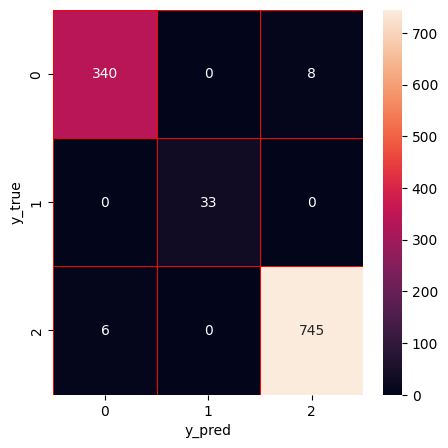

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [85]:
import pickle

pickle.dump(clf,open('thyroid.pkl','wb'))
thyroid = pickle.load(open('thyroid.pkl','rb'))